In [1]:
#import the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#initializing the dataframe
df=pd.read_csv('database_IND.csv')
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.7470,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,WRI,NaN,2018.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,WRI,NaN,2018.0,147.568450,157.558250,152.1952,61.421350,89.629600,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,WRI,NaN,2018.0,696.738800,674.391100,721.3352,675.724400,679.594950,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,WRI,NaN,2018.0,504.813250,480.594950,144.4342,402.029750,439.372100,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,WRI,NaN,2018.0,2642.322000,1887.904000,1643.0460,1338.093000,1563.457000,Central Electricity Authority,NaN


In [3]:
#checking missing values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [69]:
#getting summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    float64
 4   other_fuel1          908 non-null    float64
 5   commissioning_year   908 non-null    float64
 6   geolocation_source   908 non-null    float64
 7   generation_gwh_2017  908 non-null    float64
dtypes: float64(8)
memory usage: 56.9 KB


.We can drop  country_long and country both were same  and only one value.  
.We can also drop 'year_of_capacity_data' and 'url' as first one is only the year reported and url is the link .so, no requirement in the model.   
.We can also drop 'gppd_idnr' and 'generation_data_source' as its just a indicator number of the powerplant and 2nd one is only a source of data .             
.We can also drop 'country','name','owner','source'.           

In [4]:
#Droping unwanted column
df=df.drop(columns=['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','year_of_capacity_data','url','gppd_idnr','generation_data_source','country','name','owner','source','country_long'],axis=1)

In [5]:
#fillling null values
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

In [6]:
#RE-checking missing values
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

.Now all the null value got filled. now we, can proceed further.                 
.Now our next step to encode all the column having object datatype as model only accept int or float datatype.       

.Now we have to first encode all the column having object datatype using OrdinalEncoder.                               

.Column whose datatype is 'object' is 'country_long','primary_fuel','other_fuel1','geolocation_source'. so, we have to encode them before moving forward.         

In [7]:
#Importing OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [8]:
#Encoding column 'primary_fuel'
ord_encoder=OrdinalEncoder(categories=[['Solar','Coal', 'Wind', 'Hydro', 'Oil', 'Gas', 'Biomass', 'Nuclear']])
df2=ord_encoder.fit_transform(df[['primary_fuel']])
df2

array([[0.],
       [1.],
       [2.],
       [5.],
       [1.],
       [1.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [3.],
       [1.],
       [3.],
       [3.],
       [1.],
       [5.],
       [1.],
       [1.],
       [6.],
       [6.],
       [6.],
       [5.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [1.],
       [6.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [5.],
       [1.],
       [3.],
       [1.],
       [1.],
       [1.],
       [5.],
       [3.],
       [3.],
       [2.],
       [2.],
       [1.],
       [6.],
       [6.],
       [4.],
       [1.],
       [1.],
       [1.],

In [9]:
#Encoding column 'other_fuel1'
ord_encoder=OrdinalEncoder(categories=[['Oil','Cogeneration', 'Gas']])
df3=ord_encoder.fit_transform(df[['other_fuel1']])
df3

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [10]:
#Encoding column 'geolocation_source'
ord_encoder=OrdinalEncoder(categories=[['National Renewable Energy Laboratory','WRI', 'Industry About']])
df4=ord_encoder.fit_transform(df[['geolocation_source']])
df4

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [12]:
#OverRiding  Encoded column in the dataset
df['primary_fuel']=df2
df['other_fuel1']=df3
df['geolocation_source']=df4
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,0.0,0.0,2011.0,0.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1.0,0.0,2013.0,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,2.0,0.0,2013.0,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,5.0,0.0,2004.0,1.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1.0,0.0,2015.0,1.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [13]:
#Dataset analysis
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,2.254405,0.005507,2003.624449,1.126652,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,1.721590,0.099461,15.238021,0.345765,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1.000000,0.000000,1997.000000,1.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,2.000000,0.000000,2013.000000,1.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,3.000000,0.000000,2013.000000,1.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


.We check the outliers using zscore and if found .we will remove them.   

In [18]:
#Finding out the correlation between the features 
corr=df.corr()
corr.shape

(12, 12)

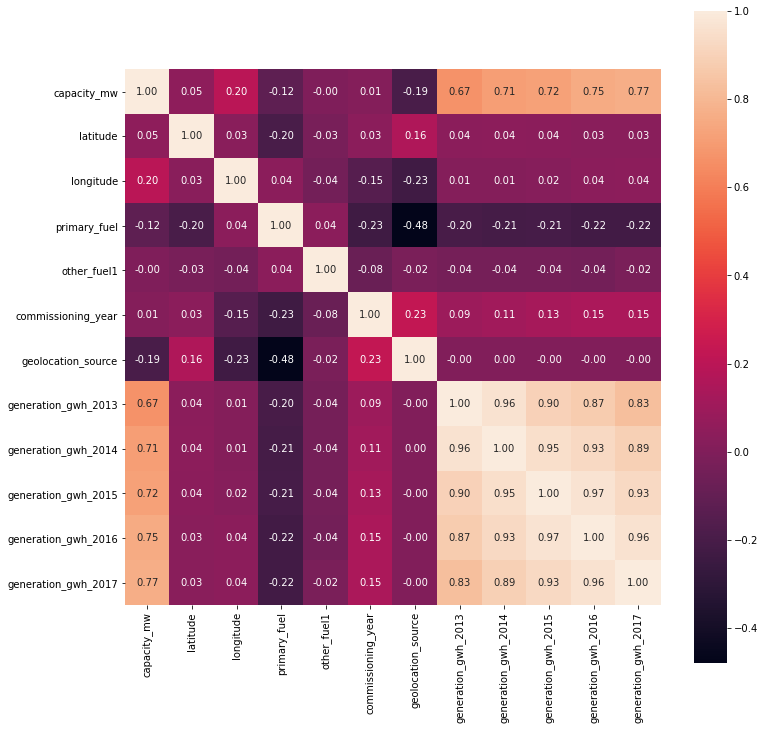

In [21]:
#Ploting the heatmap of the correlation between features 
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

.Here ,value between 'generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017' are high . so ,we can say that correlation  exists.   
Now ,we have to check scatter plot,to confirm that correlation.   

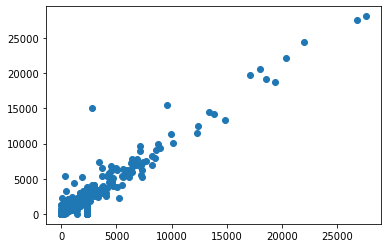

In [24]:
plt.scatter(df.generation_gwh_2013,df.generation_gwh_2014)
plt.show()

.It is confirmed that their is a relation between generation_gwh_2013 and generation_gwh_2014. so, we can drop one of them.   

In [25]:
#Droping generation_gwh_2013 
df=df.drop(['generation_gwh_2013'],axis=1)

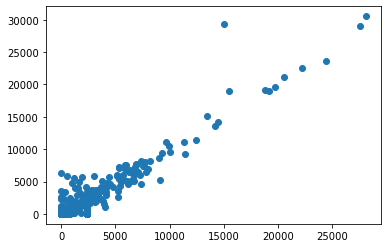

In [26]:
# Checking correlation in generation_gwh_2014 and generation_gwh_2015
plt.scatter(df.generation_gwh_2014,df.generation_gwh_2015)
plt.show()

It is confirmed that their is a relation between generation_gwh_2014 and generation_gwh_2015. so, we can drop one of them.

In [27]:
#Droping generation_gwh_2014
df=df.drop(['generation_gwh_2014'],axis=1)

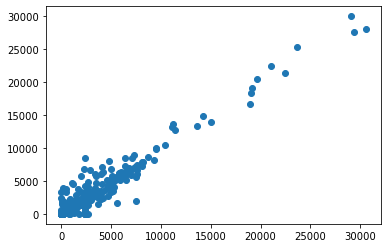

In [28]:
# Checking correlation in generation_gwh_2015 and generation_gwh_2016
plt.scatter(df.generation_gwh_2015,df.generation_gwh_2016)
plt.show()

It is confirmed that their is a relation between generation_gwh_2015 and generation_gwh_2016. so, we can drop one of them.

In [29]:
#Droping generation_gwh_2015
df=df.drop(['generation_gwh_2015'],axis=1)

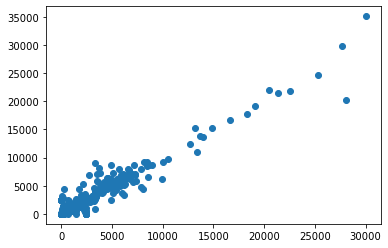

In [30]:
# Checking correlation in generation_gwh_2016 and generation_gwh_2017
plt.scatter(df.generation_gwh_2016,df.generation_gwh_2017)
plt.show()

It is confirmed that their is a relation between generation_gwh_2016 and generation_gwh_2017. so, we can drop one of them.

In [32]:
#Droping generation_gwh_2016
df=df.drop(['generation_gwh_2016'],axis=1)

In [34]:
#Finding out the correlation between the features 
corr=df.corr()
corr.shape

(8, 8)

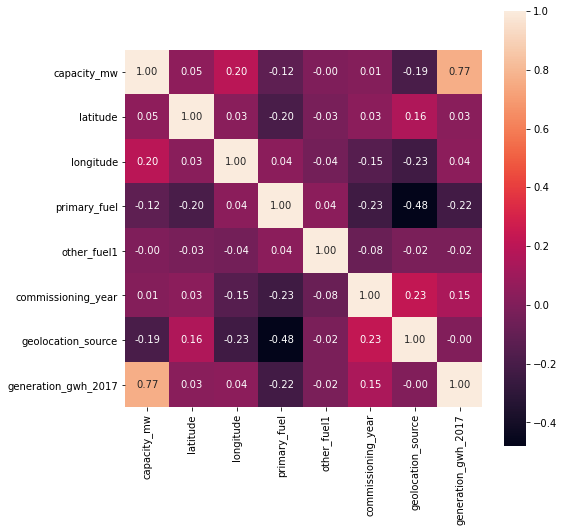

In [35]:
#Re-Ploting the heatmap of the correlation between features 
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10})
plt.show()

.Now the heat map is good. so, we can proceed further.       

In [44]:
#Dividing feature and label data
x=df.drop(columns=['capacity_mw','primary_fuel'],axis=1)
y=df['capacity_mw']

In [46]:
#Data scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [47]:
#Train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=300)

In [50]:
#AdaBoost model training
from sklearn.ensemble import AdaBoostRegressor

In [51]:
ada=AdaBoostRegressor()

In [52]:
#Model trained
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [53]:
#Model prediction on train data
y_pred=ada.predict(x_train)

In [54]:
print('R square score',metrics.r2_score(y_train,y_pred))

R square score 0.7630819669363691


In [55]:
#Predict Test data with the model
y_test_pred=ada.predict(x_test)

In [59]:
#Model Evaluation
accuracy=metrics.r2_score(y_test,y_test_pred)
print('R square score: ',accuracy)

R square score:  0.6693694523895783


In [60]:
#Doing Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [61]:
dt=DecisionTreeRegressor()

In [63]:
params={'n_estimators':[40,47,49,50,51],
       'learning_rate':[0.30,0.40,0.45,0.50]}

In [64]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [65]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45, 0.5],
                                        'n_estimators': [40, 47, 49, 50, 51]})

In [66]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.3, n_estimators=51)

In [68]:
ada=AdaBoostRegressor(base_estimator=dt,learning_rate=0.3,n_estimators=51)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

print('***accuracy post tunning***')
print(metrics.r2_score(y_test,y_pred))

***accuracy post tunning***
0.7586277457868611


.Before Hyperparameter model fit 66 % and after HyperParameter model fits 75 % of test data.            

In [82]:
#Saving the model
import pickle
filename='finalized_model.pickle'
pickle.dump(ada,open(filename,'wb'))

In [83]:
#checking overfitting using lassocv 
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [84]:
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [85]:
#best alpha parameter
alpha=lasscv.alpha_
alpha

0.0313441085940279

In [86]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0313441085940279)

In [87]:
lasso_reg.score(x_test,y_test)

0.5967652269591635

In [88]:
#RidgeCV
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.001),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
        normalize=True)

In [89]:
ridgecv.alpha_

0.023

In [90]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.023)

In [91]:
ridge_model.score(x_test,y_test)

0.5967616381960799

.As we got same r2 score using Lasso and Ridge regression .so, it's safe to say there is no overfitting. 